<a href="https://colab.research.google.com/github/JKDS87/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  - Author: Matthew Malueg

## Project Overview

## Load and Inspect Data

In [ ]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Save the filepath to the data as a variable "fpath"
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [ ]:
# Read in the file and disply the info and head
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

### Checking object type columns

In [ ]:
# Check object data types for possible numeric values
df_sales.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


Outlet_Identifier and Outlet_Location_Type are potential columns for cleaning

In [ ]:
# Check Outlet_Identifier's .value_counts()
df_sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
# Remove unnecessary 'OUT' from str
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].str.replace('OUT', '')

# Check .value_counts() to confirm
df_sales['Outlet_Identifier'].value_counts()

027    935
013    932
049    930
046    930
035    930
045    929
018    928
017    926
010    555
019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
# Conver identifiers to int
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].astype(int)

# Check dtype to confirm
df_sales['Outlet_Identifier'].dtype

dtype('int64')

In [ ]:
# Check Outlet_Location_Type's .value_counts()
df_sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# These Tiers could be better represented with numerical values
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].str.replace('Tier ', '')

# Check .value_counts() to confirm value change
df_sales['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Change the datatype to an int
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].astype(int)
# Verfy the change
df_sales['Outlet_Location_Type'].dtype

dtype('int64')

### Checking numerical columns

In [ ]:
number_cols = df_sales.select_dtypes('number')
number_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,0.016047,249.8092,49,1999,1,3735.1380
1,5.920,0.019278,48.2692,18,2009,3,443.4228
2,17.500,0.016760,141.6180,49,1999,1,2097.2700
3,19.200,0.000000,182.0950,10,1998,3,732.3800
4,8.930,0.000000,53.8614,13,1987,3,994.7052
...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,13,1987,3,2778.3834
8519,8.380,0.046982,108.1570,45,2002,2,549.2850
8520,10.600,0.035186,85.1224,35,2004,2,1193.1136
8521,7.210,0.145221,103.1332,18,2009,3,1845.5976


### Checking for duplicates

In [ ]:
# Create and save a filter to check for any duplicate rows
duped_rows = df_sales.duplicated()

# Get the sum of duped_rows filter to see the number of duped rows
duped_rows.sum()

0

There appear to be no duplicate rows.

In [ ]:
# Double check item identifiers
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Examine why multiple items have the same identifier
df_sales.sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,10,1998,NaN,3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,17,2007,NaN,2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,35,2004,Small,2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,45,2002,NaN,2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,13,1987,High,3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,49,1999,Medium,1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,10,1998,NaN,3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,27,1985,Medium,3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,19,1985,Small,1,Grocery Store,162.4552


Upon inspection, duplicated Item_Identifier's were because of the item being sold at different locations.

However, this df makes it apparent that Item_Fat_Content needs to be cleaned up.

In [ ]:
# Examine Item_Fat_Content and return to object column cleaning
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replace values
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].str.replace('LF','Low Fat').replace('low fat','Low Fat').replace('reg','Regular')

# Confirm changes
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Missing Values

In [ ]:
# Check for missing values using .isna()
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

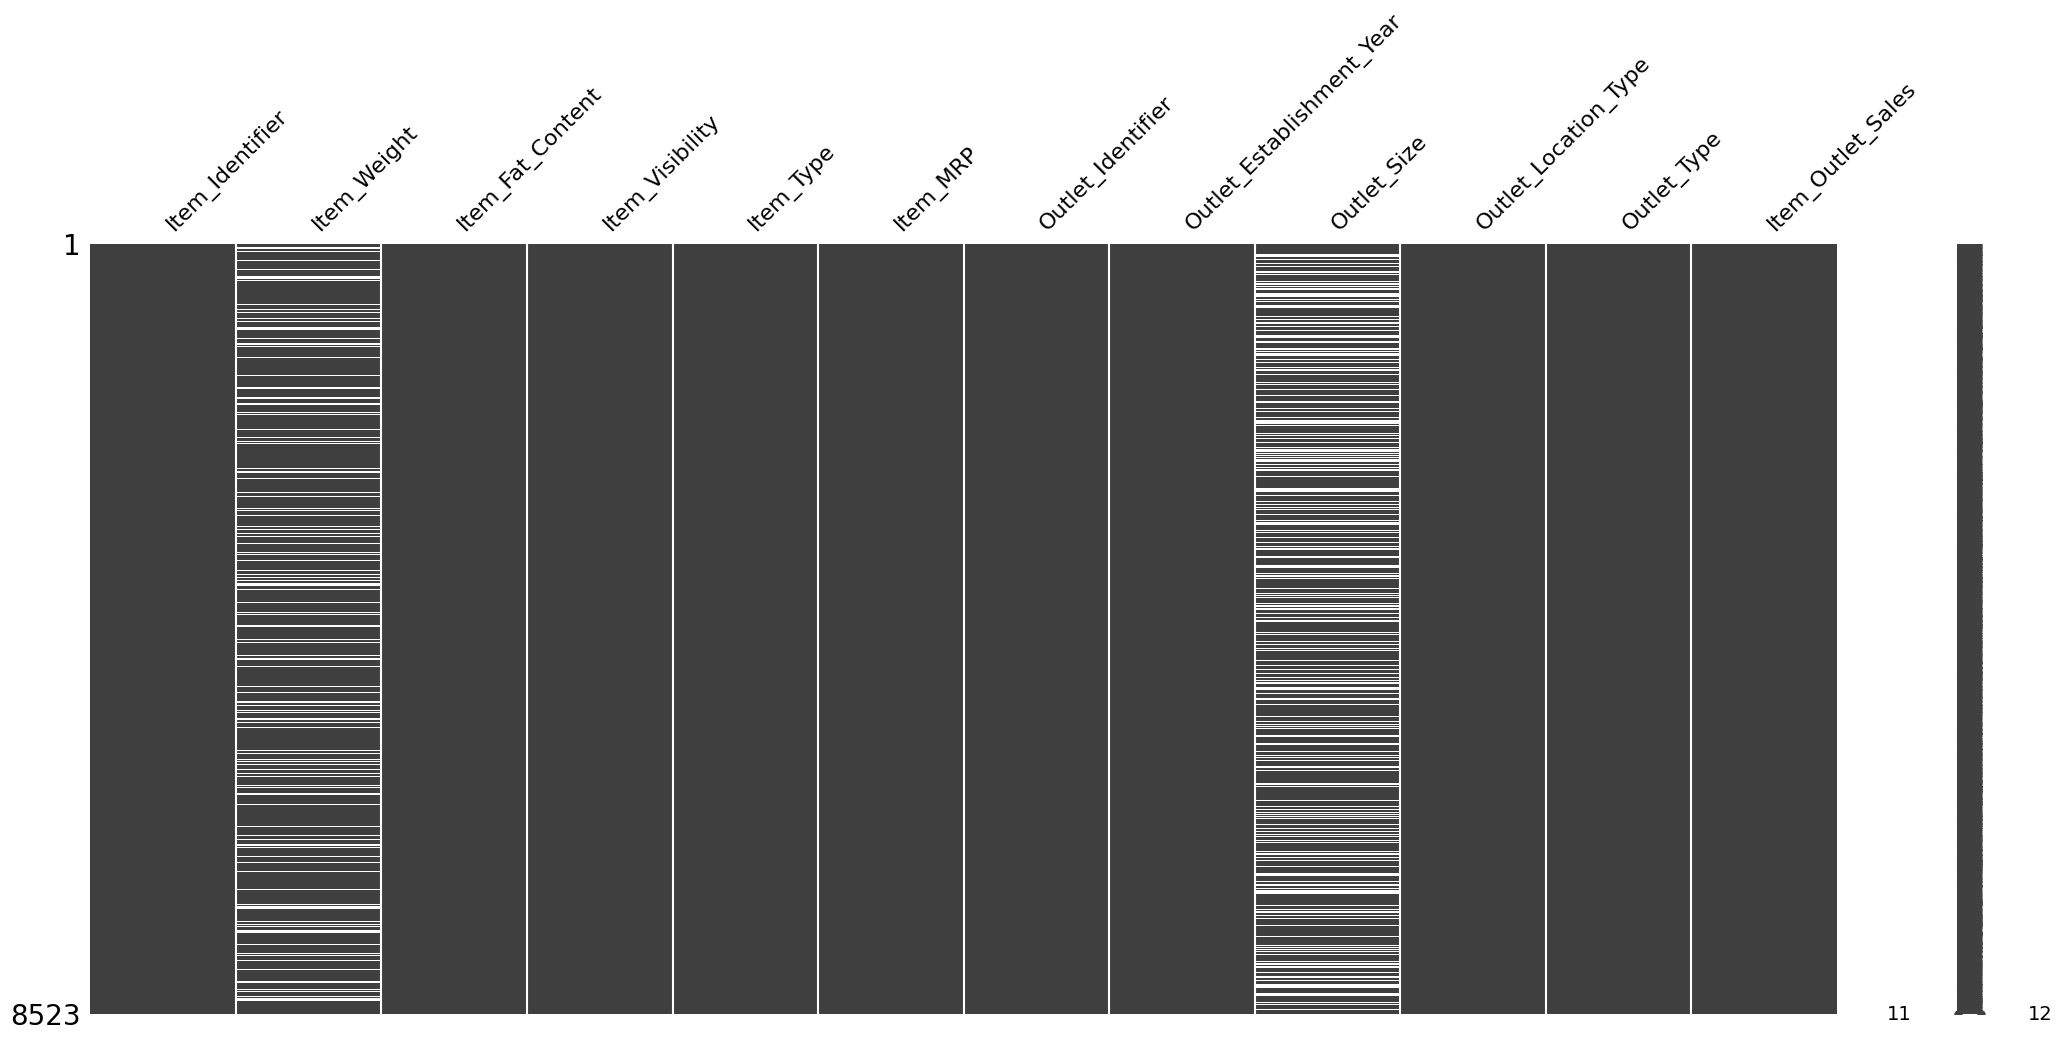

In [ ]:
# Visualize the missing values
msno.matrix(df_sales)

In [ ]:
# Item_Weight is a float, while Outlet_Size is an object

# Give Item_Weight a placeholder number, and Outlet_Size a placeholder string
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna("MISSING")
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(-1)

In [ ]:
# Confirm the NaN replacement was successful
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Examine Summary Statistics

In [ ]:
for col in number_cols:
  print(f'Summary statistics for {col}')
  print(df_sales[col].describe())
  print('\n')

Summary statistics for Item_Weight
count        8523
unique        416
top       MISSING
freq         1463
Name: Item_Weight, dtype: object


Summary statistics for Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Summary statistics for Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Summary statistics for Outlet_Identifier
count    8523.000000
mean       29.108765
std        13.927648
min        10.000000
25%        17.000000
50%        27.000000
75%        45.000000
max        49.000000
Name: Outlet_Identifier, dtype: float64


Summary statistics for Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.0

## Exploratory Data Analysis

### Histogram - view distributions of numerical data in dataset

### Boxplots - view statistical summaries of numerical features in dataset

### Countplots - view frequency of each class of categorical features in dataset

### Heatmap - view correlation between features

In [ ]:
# Check for correlations between between variables in sales dataset
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


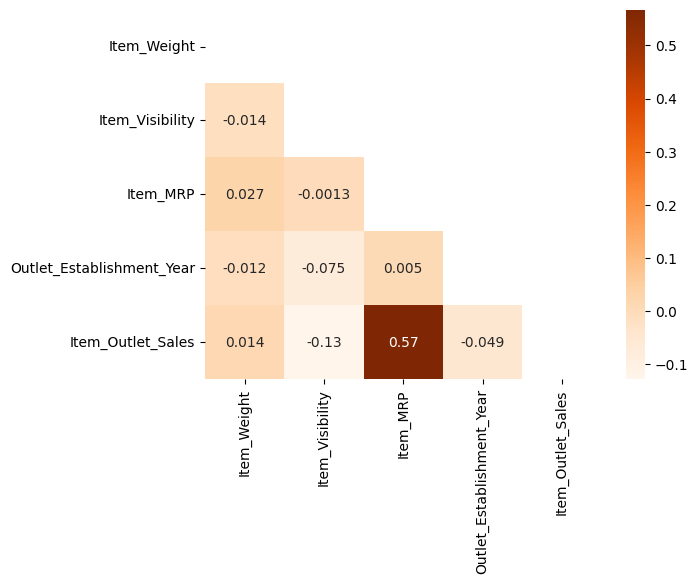

In [ ]:
# Clean up the figure with a mask
mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots()
ax = sns.heatmap(corr,
                 cmap='Oranges',
                 annot=True,
                 mask=mask,
                 );

There appears to be a significant positive correlation between Maximum Retail Price and Outlet Sales. All other values appear to be very minor or insignificant.